In [26]:
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorica

1
429


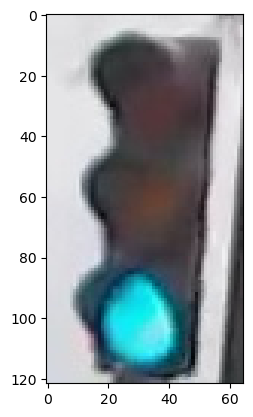

In [28]:
im_list_green=[]
# green light list 
for file in glob.glob("traffic_light_images/training/green/*"):
    # Read in the image
    im = mpimg.imread(file)          
    # Append the image to the green image list
    im_list_green.append((im,1))
    
plt.imshow(im_list_green[9][0]) # shows the label
print(im_list_green[0][1]) # print image
print(len(im_list_green)) # shows how many are in list

2
35


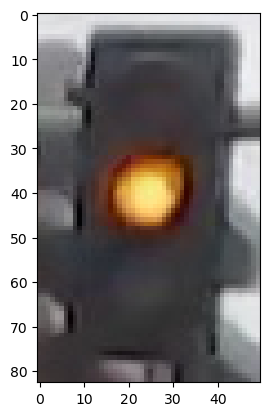

In [29]:
im_list_yellow=[]
# empty list for yellow
for file in glob.glob("traffic_light_images/training/yellow/*"):
    # Read in the image
    im = mpimg.imread(file)   
    # Append the image to the yellow image list
    im_list_yellow.append((im,2))
plt.imshow(im_list_yellow[0][0])# shows the label
print(im_list_yellow[0][1]) # print image
print(len(im_list_yellow))# shows how many are in list

0
723


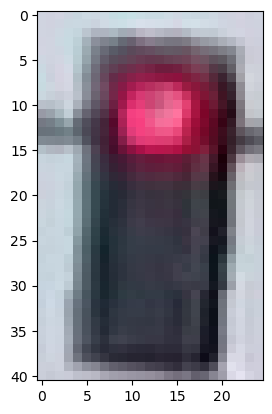

In [30]:
im_list_red=[]
# empty list
for file in glob.glob("traffic_light_images/training/red/*"):
    # Read in the image
    im = mpimg.imread(file)   
    # Append the image to the red image list
    im_list_red.append((im,0))
    
plt.imshow(im_list_red[0][0])# shows the label
print(im_list_red[0][1])# print image
print(len(im_list_red))# shows how many are in list

In [105]:
# This function standardizes an image to fit an exact size 
# this is nesscary for them all to be the same size when working with it
def standardize_input(image_list):
    standardized_images = []
    row_crop = 7
    col_crop = 8
    for image, label in image_list:
        image_crop = np.copy(image)
        image_crop = image_crop[row_crop:-row_crop, col_crop:-col_crop, :]
        standard_im = cv2.resize(image_crop, (50, 50)) # 50 by 50 pixels, something to possibly change 
        standardized_images.append((standard_im, label))
    return standardized_images


In [106]:
std_img_list_green = standardize_input(im_list_green) 
# This creates a new list of stardardized green images 

std_img_list_red = standardize_input(im_list_red)

# This creates a new list of stardardized red images 


std_img_list_yellow = standardize_input(im_list_yellow)
# This creates a new list of stardardized yellow images 


1
429


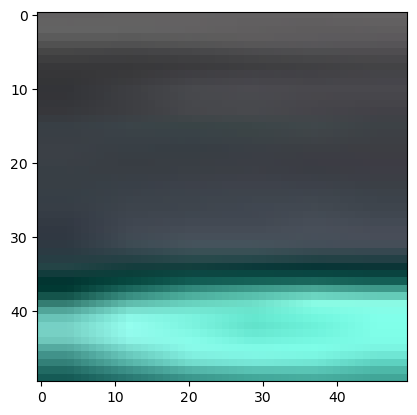

In [107]:
plt.imshow(std_img_list_green[5][0])
# print out the 5th image to make sure they all got standarized 
print(std_img_list_green[0][1])
# printed out the label to make sure it did not change
print(len(std_img_list_green))
# also printed out the length to make sure it didnt change 
# looking at new standarized image 

0
723


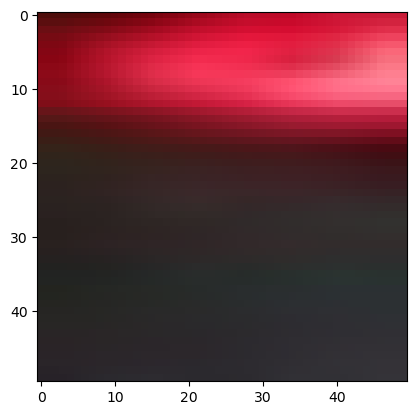

In [108]:
# Went through same steps as green
plt.imshow(std_img_list_red[5][0])

print(std_img_list_red[0][1])

print(len(std_img_list_red))

2
35


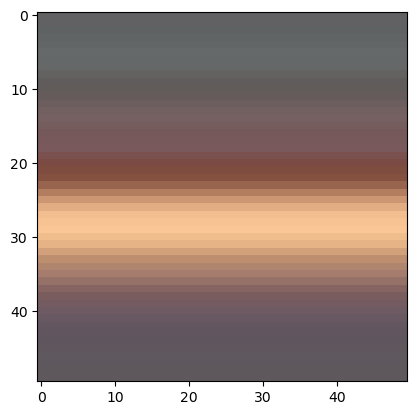

In [109]:
# Went through same steps as green

plt.imshow(std_img_list_yellow[5][0])

print(std_img_list_yellow[0][1])

print(len(std_img_list_yellow))

In [110]:
# combined all the lists together 
std_lights_list = std_img_list_green +std_img_list_red + std_img_list_yellow
std_lights_list

[(array([[[ 99, 100, 104],
          [ 99, 100, 104],
          [ 99, 100, 104],
          ...,
          [103, 104, 108],
          [103, 104, 108],
          [103, 104, 108]],
  
         [[ 95,  96, 100],
          [ 95,  96, 100],
          [ 95,  96, 100],
          ...,
          [ 97,  98, 102],
          [ 97,  98, 102],
          [ 97,  98, 102]],
  
         [[ 78,  79,  83],
          [ 78,  79,  83],
          [ 78,  79,  83],
          ...,
          [ 73,  74,  78],
          [ 73,  74,  78],
          [ 73,  74,  78]],
  
         ...,
  
         [[143, 251, 249],
          [143, 251, 249],
          [143, 251, 249],
          ...,
          [171, 248, 255],
          [171, 248, 255],
          [171, 248, 255]],
  
         [[140, 252, 250],
          [140, 252, 250],
          [140, 252, 250],
          ...,
          [163, 249, 255],
          [163, 249, 255],
          [163, 249, 255]],
  
         [[140, 253, 251],
          [140, 253, 251],
          [140, 253, 251

In [111]:
# shuffled the list randomly 
random.shuffle(std_lights_list)

In [112]:
std_lights_list

[(array([[[236, 232, 236],
          [236, 232, 235],
          [236, 231, 235],
          ...,
          [239, 240, 241],
          [241, 242, 244],
          [241, 242, 244]],
  
         [[234, 234, 236],
          [234, 234, 236],
          [233, 233, 235],
          ...,
          [242, 237, 240],
          [245, 240, 244],
          [246, 241, 245]],
  
         [[233, 235, 235],
          [233, 235, 235],
          [233, 235, 235],
          ...,
          [237, 233, 235],
          [244, 240, 243],
          [245, 242, 244]],
  
         ...,
  
         [[125, 120, 126],
          [125, 119, 125],
          [121, 115, 122],
          ...,
          [203, 197, 203],
          [236, 230, 236],
          [242, 236, 242]],
  
         [[221, 216, 222],
          [220, 215, 221],
          [215, 209, 215],
          ...,
          [215, 210, 214],
          [239, 233, 238],
          [243, 238, 242]],
  
         [[237, 232, 238],
          [237, 232, 238],
          [238, 233, 239

In [113]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(std_lights_list, test_size=0.2, random_state=42) # splits into training data 

# this extracted the training images 
# made it from a range of 0 to 1 
train_images = [item[0] for item in train_data]
train_labels = [item[1] for item in train_data]

# this exctracted the test images
# made it from a range of 0 to 1 
test_images = [item[0] for item in test_data]
test_labels = [item[1] for item in test_data]

In [114]:
# for this i made them into arrays and scaled the values before feedung them into a neural network 
# I made sure to devide them both by 255 to be scaled in the same way 
train_images = np.array(train_images) / 255.0
train_labels = np.array(train_labels)

test_images = np.array(test_images) / 255.0
test_labels = np.array(test_labels)
print(np.unique(train_labels))

[0 1 2]


In [115]:
train_images

array([[[[0.30588235, 0.12156863, 0.14509804],
         [0.30588235, 0.12156863, 0.14509804],
         [0.30588235, 0.12156863, 0.14509804],
         ...,
         [0.64705882, 0.40784314, 0.43529412],
         [0.64705882, 0.40784314, 0.43529412],
         [0.64705882, 0.40784314, 0.43529412]],

        [[0.31764706, 0.1254902 , 0.15294118],
         [0.31764706, 0.1254902 , 0.15294118],
         [0.31764706, 0.1254902 , 0.15294118],
         ...,
         [0.6745098 , 0.44705882, 0.47058824],
         [0.6745098 , 0.44705882, 0.47058824],
         [0.6745098 , 0.44705882, 0.47058824]],

        [[0.34901961, 0.14117647, 0.17254902],
         [0.34901961, 0.14117647, 0.17254902],
         [0.34901961, 0.14117647, 0.17254902],
         ...,
         [0.74509804, 0.56078431, 0.56470588],
         [0.74509804, 0.56078431, 0.56470588],
         [0.74509804, 0.56078431, 0.56470588]],

        ...,

        [[0.25490196, 0.23921569, 0.23921569],
         [0.25490196, 0.23921569, 0.23921569]

In [116]:
len(train_images)


949

In [117]:
len(train_labels)


949

In [118]:
len(test_images)


238

In [119]:
len(test_labels)

238

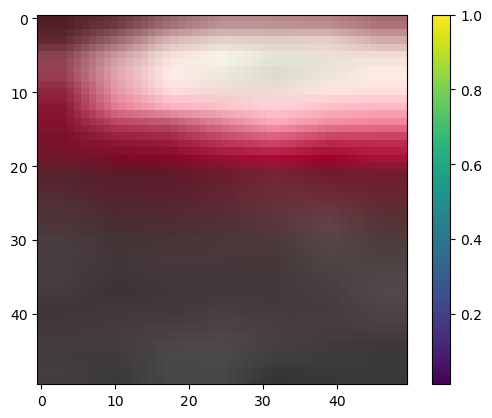

In [120]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# shows a color plot of the images 

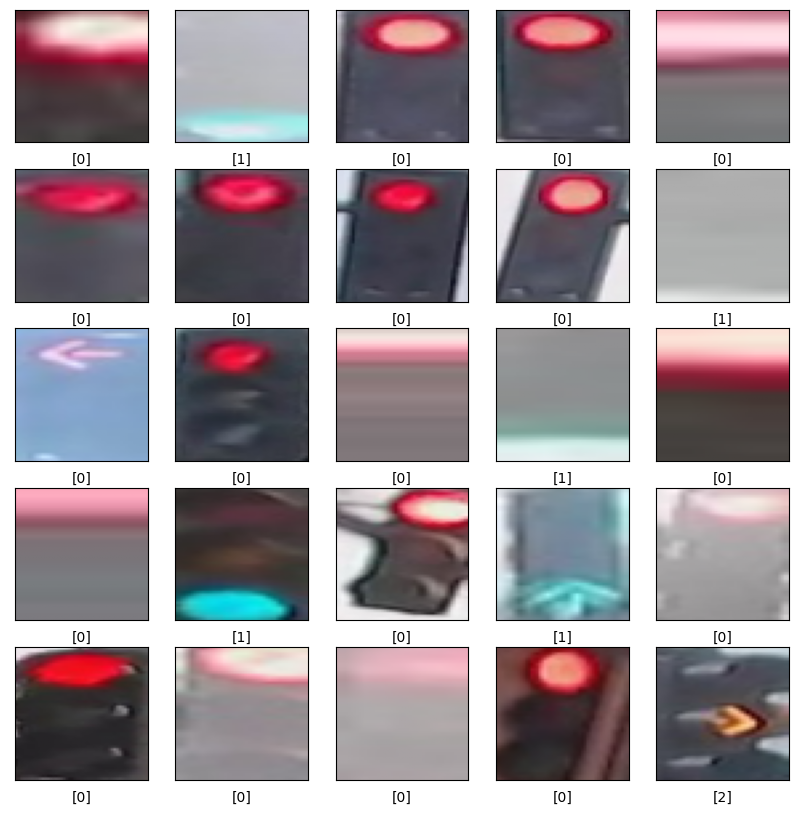

In [121]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel([train_labels[i]])
plt.show()
# the following figure was a test to see the following images with there labels. 

**CNN MODEL**

In [170]:
def CNNModel():
    model = Sequential([
    
        Conv2D(32,(3,3), activation = 'relu', input_shape=(50,50,3)), # used a 2d concoluiotnary layer and made sure to set the same imput size as the stadnzied images 
        MaxPooling2D((2,2)), # downsampled
        Conv2D(64, (3,3), activation = 'relu'),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation = 'relu'),
        Flatten(), # I flattened the input before passing it on 
        Dense(64, activation = 'relu'),
        Dense(3, activation = 'softmax')])
##both of these layers had activation layers of relu and softmax
    model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    ## compiled it using the adam optimzier and wanted t osee the accuracy 
    return model

In [171]:
cnnmodel = CNNModel()
history = cnnmodel.fit(train_images, train_labels, epochs=5, validation_split=0.25)
## I found that my model best fit the epocks of 5 and a split of ,25 whwne i had a zie of 50 by 50 dimension 

Epoch 1/5
23/23 [==============================] - 2s 51ms/step - loss: 0.3598 - accuracy: 0.8889 - val_loss: 0.1219 - val_accuracy: 0.9538
Epoch 2/5
23/23 [==============================] - 1s 45ms/step - loss: 0.0487 - accuracy: 0.9859 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 3/5
23/23 [==============================] - 1s 45ms/step - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0336 - val_accuracy: 0.9916
Epoch 4/5
23/23 [==============================] - 1s 43ms/step - loss: 0.0278 - accuracy: 0.9902 - val_loss: 0.0175 - val_accuracy: 0.9916
Epoch 5/5
23/23 [==============================] - 1s 43ms/step - loss: 0.0069 - accuracy: 0.9972 - val_loss: 0.0073 - val_accuracy: 1.0000


In [172]:
test_loss, test_accuracy = model1.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")
# evelluate accuracy 
# this was a high accuracy score as well and showed that this was the correct algorth to choose

8/8 [==============================] - 0s 5ms/step - loss: 0.0182 - accuracy: 0.9916
Test accuracy: 0.9915966391563416


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1872 - accuracy: 0.8519 - val_loss: 0.5363 - val_accuracy: 0.8876
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3725 - accuracy: 0.9112 - val_loss: 0.3037 - val_accuracy: 0.9287
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2826 - accuracy: 0.9297 - val_loss: 0.2883 - val_accuracy: 0.9316
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2415 - accuracy: 0.9387 - val_loss: 0.2405 - val_accuracy: 0.9435
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2272 - accuracy: 0.9427 - val_loss: 0.3157 - val_accuracy: 0.9306


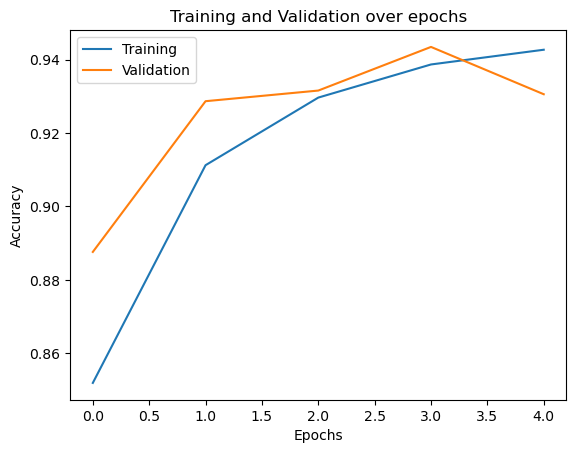

In [180]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
## the following is able to create a plot of traning and the valication accuracy 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# this complied the code, using the same type of optimizer and loss as the compiled above \\

# train the model again ( Im not sure why i had to train it again for the plot but this was the only way for it to work)
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))
# plotting 
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and Validation over epochs")
plt.legend()
plt.show()

**SVM MODEL**

In [173]:
train_flat_ = [image.flatten() for image in train_images]
test_flat_ = [image.flatten() for image in test_images]
# for the code above i was able to flatten each image into a 1 d array
SVM = SVC(kernel = 'rbf')
# decided to use a RBF kernel 
SVM.fit(train_flat_, train_labels)
# then trainiend the svm model andused the flattened test arrays 

SVC()

In [164]:
svmPredict = SVM.predict(test_flat_)
print('Accuracy: ', accuracy_score(test_labels,svmPredict))
# found the accuracy score of the SVM model 
# this is overall a really good score to get and shows that the algorith was the right one to choose 

Accuracy:  0.9957983193277311
